In [52]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import LSTM

In [5]:
data=pd.read_csv("sales",delimiter=",")


In [6]:
data.to_csv("sales.csv")

In [8]:
data.shape

(36, 2)

In [9]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


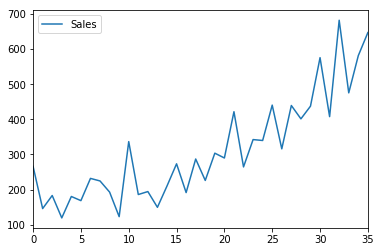

In [10]:
data.plot()

In [11]:
x=data.values

In [12]:
x

array([['1-01', 266.0],
       ['1-02', 145.9],
       ['1-03', 183.1],
       ['1-04', 119.3],
       ['1-05', 180.3],
       ['1-06', 168.5],
       ['1-07', 231.8],
       ['1-08', 224.5],
       ['1-09', 192.8],
       ['1-10', 122.9],
       ['1-11', 336.5],
       ['1-12', 185.9],
       ['2-01', 194.3],
       ['2-02', 149.5],
       ['2-03', 210.1],
       ['2-04', 273.3],
       ['2-05', 191.4],
       ['2-06', 287.0],
       ['2-07', 226.0],
       ['2-08', 303.6],
       ['2-09', 289.9],
       ['2-10', 421.6],
       ['2-11', 264.5],
       ['2-12', 342.3],
       ['3-01', 339.7],
       ['3-02', 440.4],
       ['3-03', 315.9],
       ['3-04', 439.3],
       ['3-05', 401.3],
       ['3-06', 437.4],
       ['3-07', 575.5],
       ['3-08', 407.6],
       ['3-09', 682.0],
       ['3-10', 475.3],
       ['3-11', 581.3],
       ['3-12', 646.9]], dtype=object)

In [13]:
x_train,X_test=x[:-12],x[-12:]

In [15]:
history=[x for x in x_train]

In [16]:
history


[array(['1-01', 266.0], dtype=object),
 array(['1-02', 145.9], dtype=object),
 array(['1-03', 183.1], dtype=object),
 array(['1-04', 119.3], dtype=object),
 array(['1-05', 180.3], dtype=object),
 array(['1-06', 168.5], dtype=object),
 array(['1-07', 231.8], dtype=object),
 array(['1-08', 224.5], dtype=object),
 array(['1-09', 192.8], dtype=object),
 array(['1-10', 122.9], dtype=object),
 array(['1-11', 336.5], dtype=object),
 array(['1-12', 185.9], dtype=object),
 array(['2-01', 194.3], dtype=object),
 array(['2-02', 149.5], dtype=object),
 array(['2-03', 210.1], dtype=object),
 array(['2-04', 273.3], dtype=object),
 array(['2-05', 191.4], dtype=object),
 array(['2-06', 287.0], dtype=object),
 array(['2-07', 226.0], dtype=object),
 array(['2-08', 303.6], dtype=object),
 array(['2-09', 289.9], dtype=object),
 array(['2-10', 421.6], dtype=object),
 array(['2-11', 264.5], dtype=object),
 array(['2-12', 342.3], dtype=object)]

In [17]:
predictions=list()

In [34]:
def timeseries(data,lag=1):
    df=DataFrame(data)
    columns=[df.shift(i) for i in range(1,lag+1)]
    columns.append(df)
    df=pd.concat(columns,axis=1)
    df.fillna(0,inplace=True)
    return df
df=timeseries(data)
    

In [35]:
df

,Month,Sales,Month,Sales
0,0,0.0,1-01,266.0
1,1-01,266.0,1-02,145.9
2,1-02,145.9,1-03,183.1
3,1-03,183.1,1-04,119.3
4,1-04,119.3,1-05,180.3
5,1-05,180.3,1-06,168.5
6,1-06,168.5,1-07,231.8
7,1-07,231.8,1-08,224.5
8,1-08,224.5,1-09,192.8
9,1-09,192.8,1-10,122.9


In [36]:
len(data)

36

In [42]:
def diff(dataset,interval=1):
    diff=list()
    for i in range(interval,len(dataset)):
        value=dataset[i]-dataset[i-interval]
        diff.append(value)
    return series(diff)

In [46]:
def scale(train,test):
    train=MinMaxScaler.fit_transform(train)
    test=MinMaxScalar.fit(test)
    return train,test
    
    

In [51]:
def lstm(train,batch_size,epochs,neurons):
    X,y=train[:,0:-1],train[:,-1]
    model=Sequential()
    model.add(LSTM(neurons,batch_input_size=(batch_size,X.shape[1],X.shape[2],stateful=True)))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error",optimizer="adam")
    for i in range(epochs):
        model.fit(X,y,epochs=1,batch_input_size=batch_size,verbose=1)
        model.reset_stats()
    return model